In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
df=pd.read_csv('icu_merged.csv')

In [21]:
df=df=df.drop(columns='Unnamed: 0',axis=1)

In [22]:
df.head()

,Patient ID,Patient age quantile,sars_cov2,regular_ward,semi_icu,icu,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Alanine transaminase,Aspartate transaminase,Ward
0,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
1,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.586821,-0.162200,2
2,6c9d3323975b082,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.559257,-0.549287,0
3,ebdd7c67fcb21b4,9,0,1,0,0,-0.679027,-0.711556,0.952319,-0.886869,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1
4,11e4956b770f080,17,0,0,0,0,1.014726,0.666876,-0.203368,0.459449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.366304,-0.510579,0


In [58]:
df.shape

(254, 48)

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

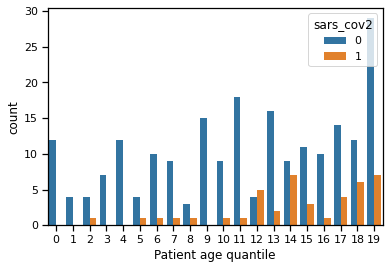

In [23]:
sns.countplot(x="Patient age quantile", data=df,hue="sars_cov2")

<Figure size 936x504 with 0 Axes>

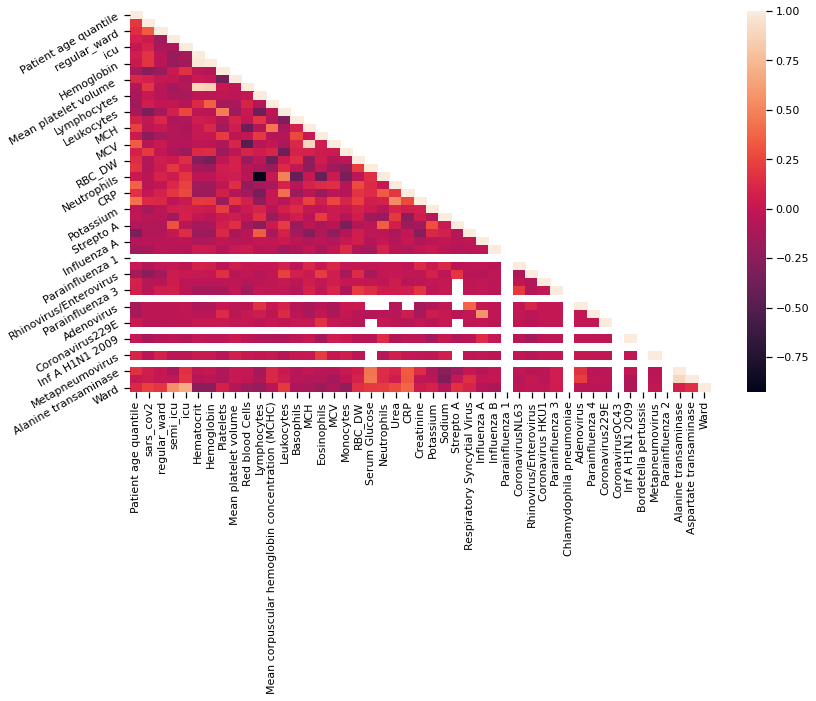

In [45]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask=mask,annot=False, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

<Figure size 1440x1080 with 0 Axes>

<AxesSubplot:>

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  42.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'sars_cov2')

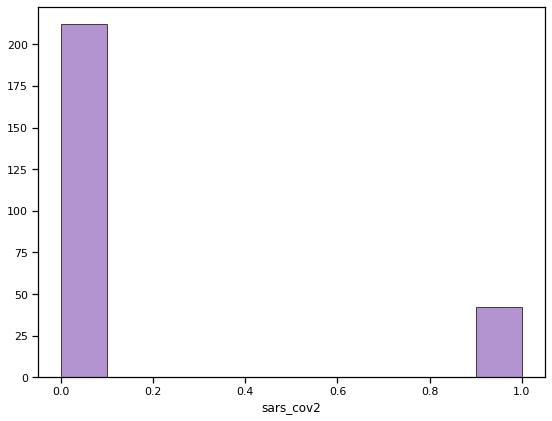

In [61]:
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.hist(df.sars_cov2, color='tab:purple', edgecolor = 'black', alpha = 0.7)
plt.xlabel('sars_cov2')

# Analysis of missing data

In [26]:
def plot_missing_data(missing_data, title):
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title(title, fontsize=15)

In [27]:
def get_missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Strepto A,220,0.866142
Serum Glucose,109,0.429134
Alanine transaminase,105,0.413386
Aspartate transaminase,105,0.413386
Neutrophils,41,0.161417
CRP,30,0.118110
Potassium,6,0.023622
Sodium,6,0.023622
Urea,5,0.019685
Mean platelet volume,2,0.007874


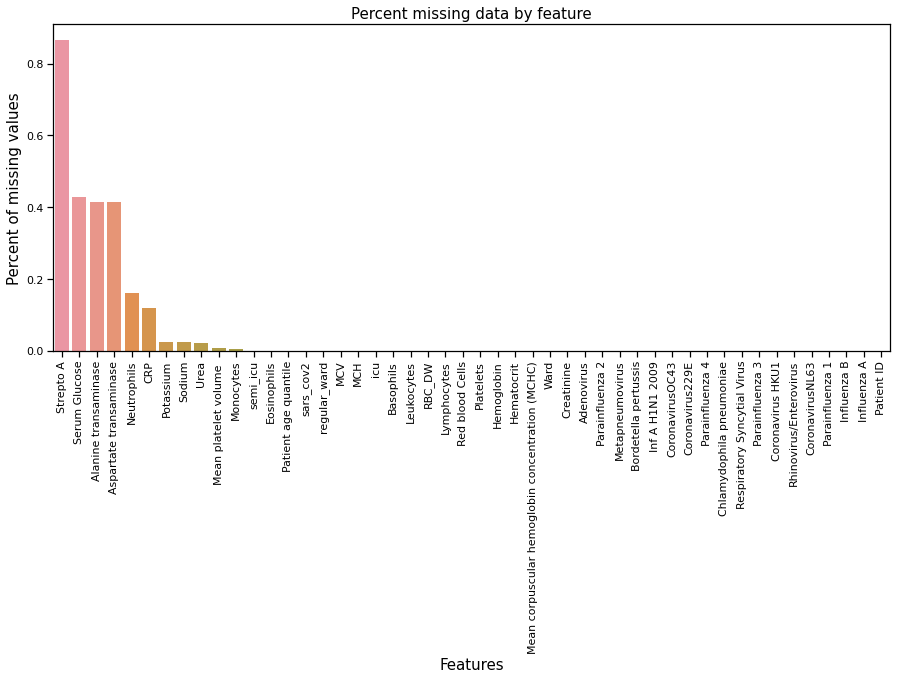

In [28]:
missing_data = get_missing_data(df)
plot_missing_data(missing_data, 'Percent missing data by feature')
missing_data.head(10)

,Total,Percent
Strepto A,39,0.928571
Serum Glucose,16,0.380952
Aspartate transaminase,15,0.357143
Alanine transaminase,15,0.357143
CRP,5,0.119048
Neutrophils,2,0.047619
Mean platelet volume,1,0.023810
regular_ward,0,0.000000
Basophils,0,0.000000
Patient age quantile,0,0.000000


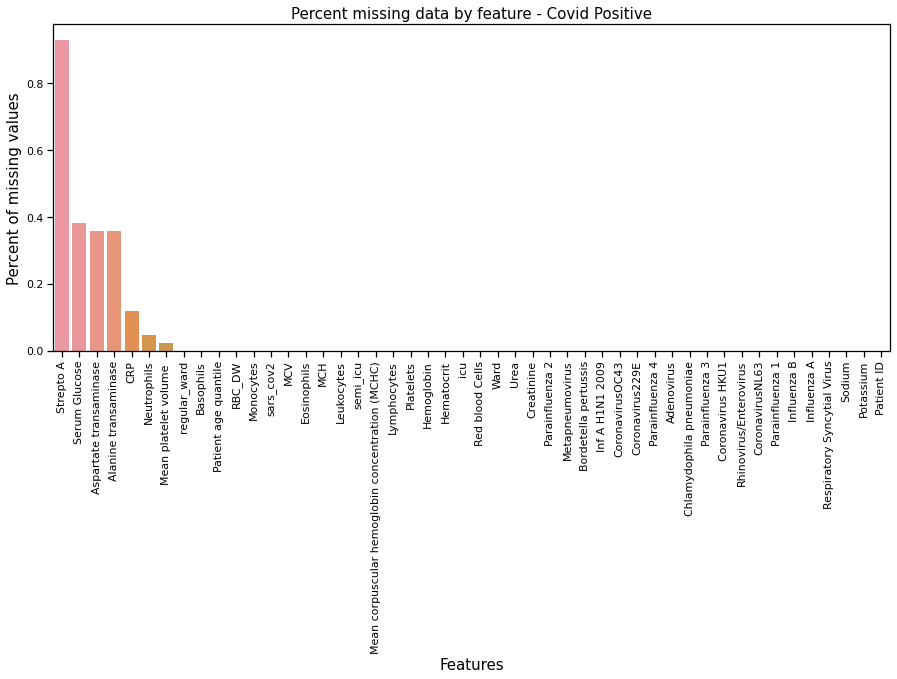

In [29]:
dataset_positive = df[df['sars_cov2'] == 1]
missing_data_positive = get_missing_data(dataset_positive)

plot_missing_data(missing_data_positive, 'Percent missing data by feature - Covid Positive')
missing_data_positive.head(10)

,Total,Percent
Strepto A,181,0.853774
Serum Glucose,93,0.438679
Alanine transaminase,90,0.424528
Aspartate transaminase,90,0.424528
Neutrophils,39,0.183962
CRP,25,0.117925
Potassium,6,0.028302
Sodium,6,0.028302
Urea,5,0.023585
Mean platelet volume,1,0.004717


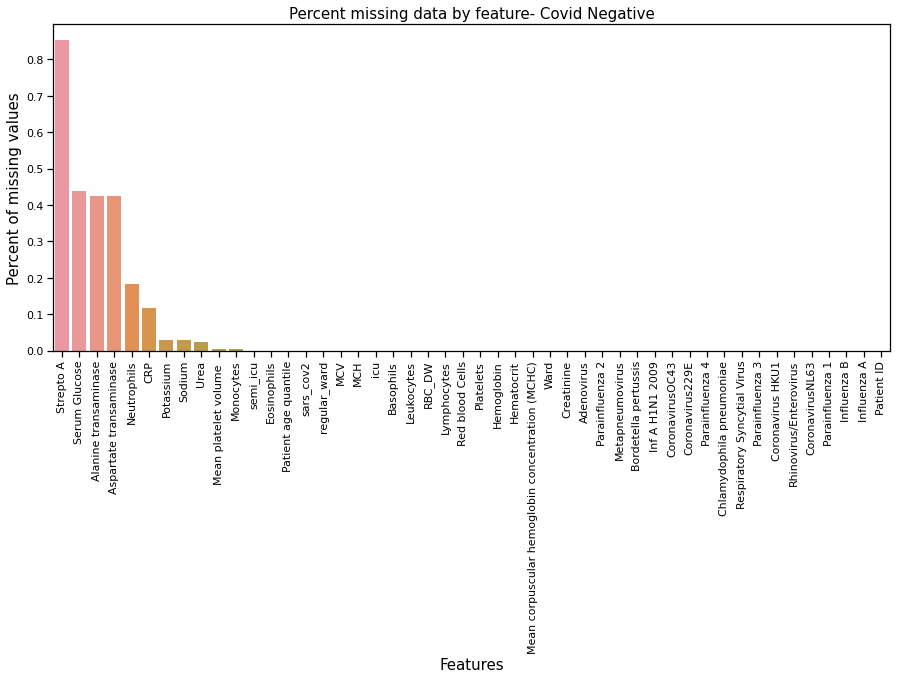

In [30]:
dataset_negative = df[df['sars_cov2'] == 0]
missing_data_negative = get_missing_data(dataset_negative)

plot_missing_data(missing_data_negative, 'Percent missing data by feature- Covid Negative')
missing_data_negative.head(10)

# Correlation Vector

In [31]:
corrmat = abs(df.corr())

In [32]:
# Correlation with output variable
cor_target = corrmat["sars_cov2"]
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15].index.tolist()

<AxesSubplot:>

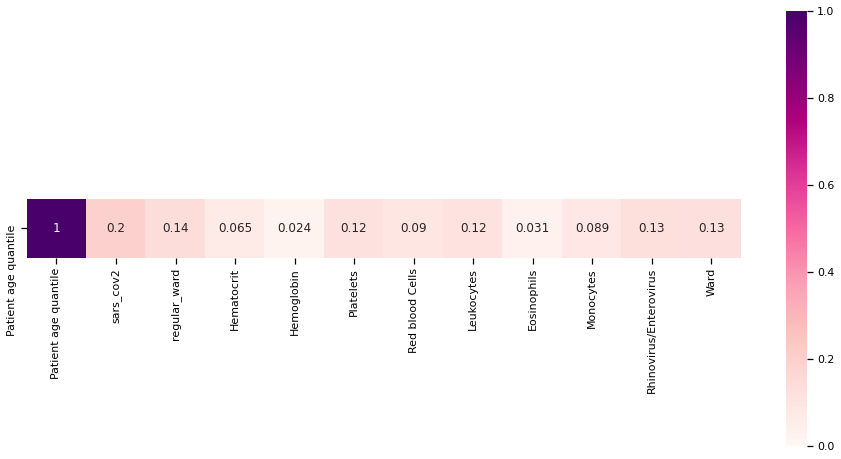

In [33]:
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(abs(df[relevant_features].corr().iloc[0:1, :]), yticklabels=[relevant_features[0]], xticklabels=relevant_features, vmin = 0.0, square=True, annot=True, vmax=1.0, cmap='RdPu')

## Negative and Positive Cases

In [34]:
nof_positive_cases = len(dataset_positive.index)
nof_negative_cases = len(dataset_negative.index)

([<matplotlib.patches.Wedge at 0x2b1e6c46e80>,
 [Text(-0.5460678054377558, 0.9548874027153115, 'Positive cases'),
  Text(0.5460678501392605, -0.9548873771520316, 'Negative cases')],
 [Text(-0.29785516660241224, 0.5208476742083517, '16.5%'),
  Text(0.29785519098505114, -0.5208476602647445, '83.5%')])

(-1.1064196051345236,
 1.1056801583281242,
 -1.105891315530647,
 1.1002805495749977)

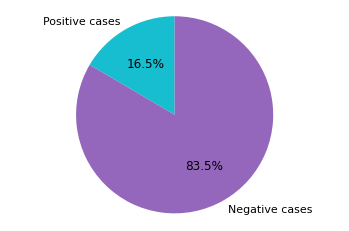

In [57]:
fig1, ax1 = plt.subplots()
ax1.pie([nof_positive_cases, nof_negative_cases], labels=['Positive cases', 'Negative cases'], autopct='%1.1f%%', startangle=90, colors=['tab:cyan', 'tab:purple'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

The Pie plot clearly indicates that the classes corresponding to the target variable 'sars_cov2' are highly imbalanced.
We therefore, apply Up-Sampling and Down-Sampling for balancing the classes.
Up-sampling should be done to Positive Class (minority Class) and Down-Sampling to Negative class (majority class)

## Admission to respective wards

In [35]:
dataset_noward = df[df['Ward'] == 0]
dataset_regular = df[df['Ward'] == 1]
dataset_semiicu = df[df['Ward'] == 2]
dataset_icu = df[df['Ward'] == 3]


In [36]:
nof_noward = len(dataset_noward.index)
nof_regular = len(dataset_regular.index)
nof_semiicu = len(dataset_semiicu.index)
nof_icu = len(dataset_icu.index)


([<matplotlib.patches.Wedge at 0x2b1e69ab978>,
 [Text(-0.961568240365731, -0.5342157982687822, 'Not Admitted'),
  Text(1.0969723936443831, -0.08155714304775954, 'Regular ward'),
  Text(0.7826128329564888, 0.7729923374082172, 'Semi-ICU'),
  Text(0.2295900765391226, 1.075773394704833, 'ICU')],
 [Text(-0.5244917674722168, -0.2913904354193357, '66.1%'),
  Text(0.5983485783514817, -0.04448571438968702, '15.4%'),
  Text(0.42687972706717564, 0.4216321840408457, '11.8%'),
  Text(0.1252309508395214, 0.5867854880208179, '6.7%')])

(-1.1026423235405785,
 1.1097917452711665,
 -1.1042010302559175,
 1.1002000490598056)

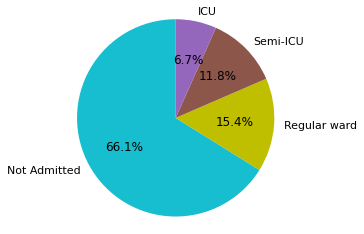

In [53]:
fig1, ax1 = plt.subplots()
ax1.pie([nof_noward, nof_regular, nof_semiicu, nof_icu], labels=['Not Admitted', 'Regular ward','Semi-ICU', 'ICU'], autopct='%1.1f%%', startangle=90, colors=['tab:cyan','y','tab:brown','tab:purple'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

The Pie plot clearly indicates that the classes corresponding to the target variable 'Ward' are highly imbalanced. We therefore, apply Up-Sampling and Down-Sampling for balancing the classes.
'Not Admitted' class needs Down-sampling while the remaining three classes need Up-Sampling.